# CAP 6618 - Machine Learning for Computer Vision

# Project 3: Digit Classification using Convolutional Neural Networks
Design and implement a complete solution to the problem of handwritten digit recognition, stated as follows: “given an image of a handwritten digit, produce the corresponding numerical value.” Essentially, you will build, fine-tune, and evaluate a 10-class (multi-layer perceptron) convolutional neural network (CNN)-based classifier which will employ the pixel values of the images as features.

### Educational Objectives
* Learn how to implement a convolutional neural network-based classifier in Keras (with Tensorflow as a backend)
* Learn how to evaluate and fine-tune the performance of the neural network-based classifier
* Learn how to test the neural network-based classifier and produce a set of plots, performance measures, and results that can be compared against other groups / classmates

### Source / Documentation
* https://github.com/keras-team/keras 
* https://keras.io/

### Model Reproducibility with GPU

When train the model using GPU, the backend may be configured to used a sophisticated stack of GPU libraries and that some of them may introduce their own source of randomness that you may or may not be able to account for. In additionally, GPU run many operations in parallel so the order of execution is not always guaranteed. 

* https://keras.io/getting_started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
* https://machinelearningmastery.com/reproducible-results-neural-networks-keras/
* https://stackoverflow.com/questions/48631576/reproducible-results-using-keras-with-tensorflow-backend
* https://www.youtube.com/watch?v=TB07_mUMt0U&feature=youtu.be

# Step 1: Setup

### Make sure to have tensorflow and keras installed!

In [1]:
# Imports
from __future__ import print_function

import numpy as np
import random

# Tensorflow
import tensorflow as tf

# Keras
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras import backend as K

Using TensorFlow backend.


In [2]:
# To make the notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

### Shared Methods

In [3]:
def plot_digits(instances, images_per_row=10, **options):
    """ Method to plot sample digits"""
    size = 28
    
    # If there are instances, plot them
    if(len(instances)):
        images_per_row = min(len(instances), images_per_row)
        images = [instance.reshape(size,size) for instance in instances]
        n_rows = (len(instances) - 1) // images_per_row + 1
        row_images = []
        n_empty = n_rows * images_per_row - len(instances)
        images.append(np.zeros((size, size * n_empty)))
        for row in range(n_rows):
            rimages = images[row * images_per_row : (row + 1) * images_per_row]
            row_images.append(np.concatenate(rimages, axis=1))
        image = np.concatenate(row_images, axis=0)
        plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    # Else, plot an empty plot
    else:
        empty_array = np.zeros((5, 5))
        plt.imshow(empty_array, cmap = matplotlib.cm.binary, **options)
    
    plt.axis("off")

# Step 2: Load (and split) the MNIST dataset

In [4]:
# Load, shuffle, and split the dataset to train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalized: RGB image range [0, 255] => range [0, 1]
x_train /= 255
x_test /= 255

print('Train Samples: ', x_train.shape[0])
print('Test Samples: ', x_test.shape[0])

Train Samples:  60000
Test Samples:  10000


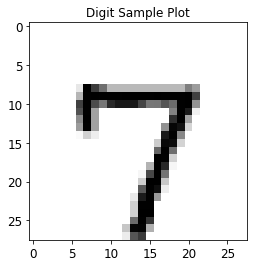

In [5]:
# Plot a random digit sample
some_digit_index = 37500
some_digit = x_train[some_digit_index]
some_digit_image = np.reshape(some_digit,(28, 28))
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")

plt.title("Digit Sample Plot")
plt.show()

In [6]:
# Print the sample digit's label
some_digit_label = y_train[some_digit_index]
print('The ground truth label for the sample digit above is', some_digit_label)

The ground truth label for the sample digit above is 7


# Step 3: Prepare the data

In [7]:
# Digit classes from 0 to 9 (10 classes in total)
num_classes = 10

# Convert Class Vectors to Binary Class Matrices
# https://keras.io/api/utils/python_utils/#to_categorical-function
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Step 4: Build the Deep MLP in Keras  

Deep MLP Configurations: 
1. Input layer (dense = fully-connected) with input size 784 + First hidden layer with 512 neurons
2. Dropout layer with dropout rate 0.2 (prevent overfitting)
3. Second hidden layer with 512 neurons
4. Dropout layer with dropout rate 0.2
5. Output layer with 10 output classes with softmax activation

In [8]:
# https://keras.io/api/models/sequential/
# https://keras.io/api/layers/core_layers/dense/
# https://keras.io/api/layers/regularization_layers/dropout/
# https://github.com/keras-team/keras/issues/2645

# Configure the Deep MLP
deep_MLP = Sequential()
deep_MLP.add(Dense(512, activation='relu', input_shape=(784,)))
deep_MLP.add(Dropout(0.2))
deep_MLP.add(Dense(512, activation='relu'))
deep_MLP.add(Dropout(0.2))
deep_MLP.add(Dense(num_classes, activation='softmax'))

deep_MLP.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
deep_MLP.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


# Step 5: Train the first network  

12 epochs, mini-batch size = 128 <br/>

In [9]:
# Train the deep MLP
batch_size = 128
epochs = 12

deep_MLP_history = deep_MLP.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                                verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 2s 31us/step - loss: 0.2464 - accuracy: 0.9248 - val_loss: 0.1392 - val_accuracy: 0.9556
Epoch 2/12
60000/60000 [==============================] - 1s 24us/step - loss: 0.1017 - accuracy: 0.9694 - val_loss: 0.0974 - val_accuracy: 0.9715
Epoch 3/12
60000/60000 [==============================] - 1s 23us/step - loss: 0.0753 - accuracy: 0.9772 - val_loss: 0.0789 - val_accuracy: 0.9768
Epoch 4/12
60000/60000 [==============================] - 1s 25us/step - loss: 0.0614 - accuracy: 0.9819 - val_loss: 0.0714 - val_accuracy: 0.9799
Epoch 5/12
60000/60000 [==============================] - 2s 26us/step - loss: 0.0507 - accuracy: 0.9853 - val_loss: 0.0709 - val_accuracy: 0.9816
Epoch 6/12
60000/60000 [==============================] - 1s 24us/step - loss: 0.0442 - accuracy: 0.9872 - val_loss: 0.0770 - val_accuracy: 0.9822
Epoch 7/12
60000/60000 [==============================] - 1s 23us/st

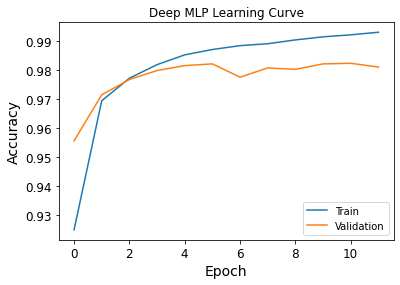

In [10]:
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html

# Plot the learning Curve for Deep MLP
plt.plot(deep_MLP_history.history['accuracy'])
plt.plot(deep_MLP_history.history['val_accuracy'])
plt.title('Deep MLP Learning Curve')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc=4)
plt.show()

In [11]:
# 'keras.utils.to_categorical' convert the label to array so need to convert to class label again
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [12]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# https://numpy.org/doc/stable/reference/generated/numpy.argmax.html
from sklearn.metrics import confusion_matrix

y_train_pred = deep_MLP.predict(x_train)

# Convert back to class label instead of array
y_train_label = y_train.argmax(axis=1)
y_train_pred_label = y_train_pred.argmax(axis=1)

conf_mx = confusion_matrix(y_train_label, y_train_pred_label)
conf_mx

array([[5914,    0,    1,    0,    0,    0,    3,    0,    5,    0],
       [   0, 6701,    5,    2,    1,    2,    1,    3,   27,    0],
       [   1,    0, 5946,    6,    1,    0,    1,    0,    3,    0],
       [   0,    0,    0, 6121,    0,    0,    0,    1,    8,    1],
       [   0,    0,    0,    0, 5834,    0,    1,    1,    1,    5],
       [   1,    0,    1,   13,    1, 5387,    5,    0,   13,    0],
       [   2,    0,    0,    0,    0,    2, 5909,    0,    5,    0],
       [   0,    2,    2,    0,    0,    0,    0, 6255,    3,    3],
       [   1,    2,    0,    1,    0,    0,    0,    0, 5846,    1],
       [   1,    0,    0,   12,    3,    0,    0,    7,   24, 5902]],
      dtype=int64)

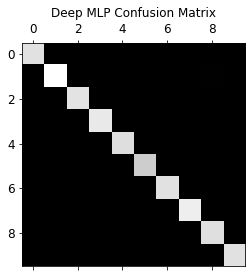

In [13]:
# Plot the result confusion matrix
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.title('Deep MLP Confusion Matrix')
plt.show()

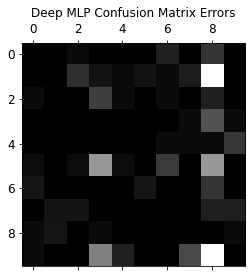

In [14]:
# Plot the confusion matrix errors (the lighter the block, the more errors)
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.title('Deep MLP Confusion Matrix Errors')
plt.show()

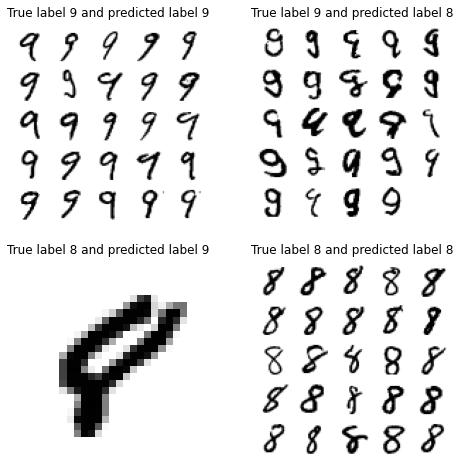

In [15]:
# Based on the confusion matrix, the model seem to make the most mistakes
# when classifying digits with true label i but predict them to be j

# https://numpy.org/doc/stable/reference/generated/numpy.unravel_index.html
i,j = np.unravel_index(norm_conf_mx.argmax(), norm_conf_mx.shape)

cl_a, cl_b = i, j
X_aa = x_train[(y_train_label == cl_a) & (y_train_pred_label  == cl_a)]
X_ab = x_train[(y_train_label == cl_a) & (y_train_pred_label  == cl_b)]
X_ba = x_train[(y_train_label == cl_b) & (y_train_pred_label  == cl_a)]
X_bb = x_train[(y_train_label == cl_b) & (y_train_pred_label  == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221).set_title('True label '+ str(i) + ' and predicted label '+ str(i)); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222).set_title('True label '+ str(i) + ' and predicted label '+ str(j)); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223).set_title('True label '+ str(j) + ' and predicted label '+ str(i)); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224).set_title('True label '+ str(j) + ' and predicted label '+ str(j)); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

# Step 6: Evaluate performance on test set

In [16]:
# Evalute the performance 
deep_MLP_score = deep_MLP.evaluate(x_test, y_test, verbose=0)
print('Test Accuracy:', round(deep_MLP_score[1], 5))
print('Test Loss:', round(deep_MLP_score[0], 5))

Test Accuracy: 0.9811
Test Loss: 0.09985


# Step 7: Build and Train the Convolution Neural Network in Keras  

### Reload and reshape the dataset for CNN

In [17]:
# Input image dimensions
img_rows, img_cols = 28, 28

# Load, shuffled, and split the data into train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print('Train Samples: ', x_train.shape[0])
print('Test Samples: ', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Train Samples:  60000
Test Samples:  10000


### Prepare the data

In [18]:
# Digit classes from 0 to 9 (10 classes in total)
num_classes = 10

# Convert Class Vectors to Binary Class Matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Build the model

CNN Configurations: 
1. Convolutional layer with 32 filters of size 3x3, input image shape is (28, 28, 1), and strides is (1, 1) by default
2. Convolutional layer with 64 filters of size 3x3
3. Max Pooling of size 2x2 to downsample (reduce the spatial dimensions to focus on the most important)
4. Dropout with the rate of 0.25 to prevent overfitting
5. Flatten the features identified in the previous layers into a vector
6. Dense (fully-connected) layer with 128 neurons
7. Another dropout with the rate of 0.5
8. Output class with activation softmax

Note: Recommend practice for designing CNN architectures = As the output spatial volume (size) is decreasing, increase the number of filters. As far as choosing the appropriate number of filters, it is recommend using powers of 2 as the values. https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/

In [19]:
# https://keras.io/api/layers/convolution_layers/
# https://keras.io/api/layers/pooling_layers/max_pooling2d/
# https://keras.io/api/layers/regularization_layers/dropout/
# https://keras.io/api/layers/reshaping_layers/flatten/

CNN_model = Sequential()
CNN_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
CNN_model.add(Conv2D(64, (3, 3), activation='relu'))
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
CNN_model.add(Dropout(0.25))
CNN_model.add(Flatten())
CNN_model.add(Dense(128, activation='relu'))
CNN_model.add(Dropout(0.5))
CNN_model.add(Dense(num_classes, activation='softmax'))

CNN_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
CNN_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)              

###  Train the CNN

12 epochs, mini-batch size = 128 <br/>

In [20]:
batch_size = 128
epochs = 12

CNN_model_history = CNN_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                                 verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 5s 91us/step - loss: 0.2727 - accuracy: 0.9166 - val_loss: 0.0518 - val_accuracy: 0.9824
Epoch 2/12
60000/60000 [==============================] - 4s 59us/step - loss: 0.0877 - accuracy: 0.9732 - val_loss: 0.0408 - val_accuracy: 0.9859
Epoch 3/12
60000/60000 [==============================] - 4s 59us/step - loss: 0.0665 - accuracy: 0.9799 - val_loss: 0.0386 - val_accuracy: 0.9866
Epoch 4/12
60000/60000 [==============================] - 4s 61us/step - loss: 0.0538 - accuracy: 0.9834 - val_loss: 0.0320 - val_accuracy: 0.9891
Epoch 5/12
60000/60000 [==============================] - 4s 59us/step - loss: 0.0461 - accuracy: 0.9865 - val_loss: 0.0307 - val_accuracy: 0.9903
Epoch 6/12
60000/60000 [==============================] - 4s 59us/step - loss: 0.0421 - accuracy: 0.9869 - val_loss: 0.0292 - val_accuracy: 0.9900
Epoch 7/12
60000/60000 [==============================] - 4s 59us/st

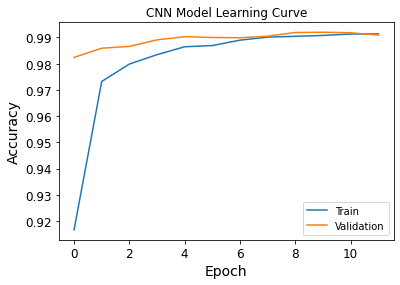

In [21]:
# Plot the learning Curve for CNN
plt.plot(CNN_model_history.history['accuracy'])
plt.plot(CNN_model_history.history['val_accuracy'])
plt.title('CNN Model Learning Curve')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc=4)
plt.show()

In [22]:
# Calculate for Confusion Matrix
y_train_pred = CNN_model.predict(x_train)
y_train_label = y_train.argmax(axis=1)
y_train_pred_label = y_train_pred.argmax(axis=1)

conf_mx = confusion_matrix(y_train_label, y_train_pred_label)
conf_mx

array([[5922,    0,    0,    0,    0,    0,    1,    0,    0,    0],
       [   0, 6735,    1,    0,    0,    0,    0,    6,    0,    0],
       [   0,    2, 5952,    1,    0,    0,    0,    3,    0,    0],
       [   0,    0,    4, 6120,    0,    1,    0,    3,    2,    1],
       [   1,    4,    0,    0, 5822,    0,    2,    2,    3,    8],
       [   1,    1,    1,    8,    0, 5404,    4,    0,    2,    0],
       [   2,    2,    0,    1,    1,    1, 5911,    0,    0,    0],
       [   0,    7,    6,    0,    1,    0,    0, 6249,    2,    0],
       [   2,    3,    1,    1,    0,    2,    1,    1, 5838,    2],
       [   2,    1,    0,    5,    9,    5,    0,   12,    4, 5911]],
      dtype=int64)

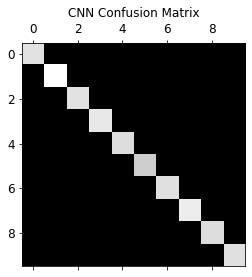

In [23]:
# Plot the result confusion matrix
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.title('CNN Confusion Matrix')
plt.show()

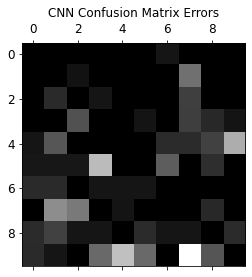

In [24]:
# Plot the confusion matrix errors (the lighter the block, the more errors)
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.title('CNN Confusion Matrix Errors')
plt.show()

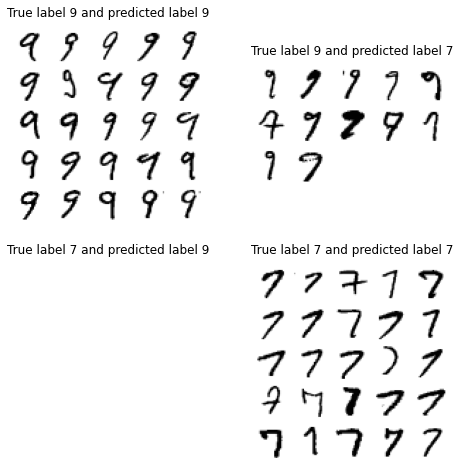

In [25]:
# Based on the confusion matrix, the model seem to make the most mistakes
# when classifying digits with true label i but predict them to be j

i,j = np.unravel_index(norm_conf_mx.argmax(), norm_conf_mx.shape)

cl_a, cl_b = i, j
X_aa = x_train[(y_train_label == cl_a) & (y_train_pred_label  == cl_a)]
X_ab = x_train[(y_train_label == cl_a) & (y_train_pred_label  == cl_b)]
X_ba = x_train[(y_train_label == cl_b) & (y_train_pred_label  == cl_a)]
X_bb = x_train[(y_train_label == cl_b) & (y_train_pred_label  == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221).set_title('True label '+ str(i) + ' and predicted label '+ str(i)); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222).set_title('True label '+ str(i) + ' and predicted label '+ str(j)); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223).set_title('True label '+ str(j) + ' and predicted label '+ str(i)); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224).set_title('True label '+ str(j) + ' and predicted label '+ str(j)); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

### Evaluate performance of CNN on test set

In [26]:
CNN_model_score = CNN_model.evaluate(x_test, y_test, verbose=0)
print('Test Accuracy:', round(CNN_model_score[1], 5))
print('Test Loss:', round(CNN_model_score[0], 5))

Test Accuracy: 0.9909
Test Loss: 0.02699


## Hyperparameters Optimization
Adapted from:
* https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/ 
* https://queirozf.com/entries/scikit-learn-pipeline-examples#pipeline-with-a-keras-model

In [27]:
def create_keras_model(optimizer=keras.optimizers.Adadelta()):
    """ Create, complies, and returns a Keras model
        Pass to the KerasClassifier in the Keras scikit-learn API"""
    
    # Create Model 
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile Model
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])

    return model

#### Training Parameters Optimization

In [28]:
# Chosen parameters for optimization
train_parameters = {'batch_size': [32, 64, 128],
                    'epochs': [6, 12, 18]}

In [29]:
            ###  Exhaustive Grid Search with KerasClassifier API ###

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# https://www.tensorflow.org/api_docs/python/tf/keras/wrappers/scikit_learn/KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

TP_model = KerasClassifier(build_fn=create_keras_model, verbose=0)

TP_model_grid = GridSearchCV(estimator=TP_model, param_grid=train_parameters, cv=3)
TP_model_grid_result = TP_model_grid.fit(x_train, y_train)

In [30]:
print("BEST: %f using %s" % (TP_model_grid_result.best_score_, TP_model_grid_result.best_params_))

means = TP_model_grid_result.cv_results_['mean_test_score']
stds = TP_model_grid_result.cv_results_['std_test_score']
params = TP_model_grid_result.cv_results_['params']

for mean, std, param in zip(means, stds, params):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, param))

BEST: 0.989800 using {'batch_size': 128, 'epochs': 18}
0.987 (+/-0.002) for {'batch_size': 32, 'epochs': 6}
0.987 (+/-0.003) for {'batch_size': 32, 'epochs': 12}
0.988 (+/-0.002) for {'batch_size': 32, 'epochs': 18}
0.988 (+/-0.001) for {'batch_size': 64, 'epochs': 6}
0.989 (+/-0.001) for {'batch_size': 64, 'epochs': 12}
0.989 (+/-0.002) for {'batch_size': 64, 'epochs': 18}
0.987 (+/-0.002) for {'batch_size': 128, 'epochs': 6}
0.989 (+/-0.001) for {'batch_size': 128, 'epochs': 12}
0.990 (+/-0.001) for {'batch_size': 128, 'epochs': 18}


#### Optimizers Optimization

In [31]:
# Use the result from the GridSearchCV of Training parameter to GridSearchCV optimizers

# https://keras.io/api/optimizers/
optimizers = {'optimizer': ['SGD', 'RMSprop', 'Adam']}

optimizers_model = KerasClassifier(build_fn=create_keras_model, verbose=0,
                                   epochs=TP_model_grid_result.best_params_['epochs'],
                                   batch_size=TP_model_grid_result.best_params_['batch_size'])

optimizers_grid = GridSearchCV(estimator=optimizers_model, param_grid=optimizers, cv=3)
optimizers_grid_result = optimizers_grid.fit(x_train, y_train)


print("BEST: %f using %s" % (optimizers_grid_result.best_score_, optimizers_grid_result.best_params_))

means = optimizers_grid_result.cv_results_['mean_test_score']
stds = optimizers_grid_result.cv_results_['std_test_score']
params = optimizers_grid_result.cv_results_['params']

for mean, std, param in zip(means, stds, params):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, param))

BEST: 0.989350 using {'optimizer': 'Adam'}
0.965 (+/-0.005) for {'optimizer': 'SGD'}
0.988 (+/-0.001) for {'optimizer': 'RMSprop'}
0.989 (+/-0.001) for {'optimizer': 'Adam'}


#### More Hyperparameters Optimization Options: 
* Tune Learning Rate and Momentum
* Tune Network Weight Initialization
* Tune the Neuron Activation Function
* Tune Dropout Regularization
* Tune the Number of Neurons in the Hidden Layer

For more detail: https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

## CNN with Hyperparameters Optimization

In [32]:
# Configure the model with paramter values from the optimization sections

model_optimization = Sequential()
model_optimization.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model_optimization.add(Conv2D(64, (3, 3), activation='relu'))
model_optimization.add(MaxPooling2D(pool_size=(2, 2)))
model_optimization.add(Dropout(0.25))
model_optimization.add(Flatten())
model_optimization.add(Dense(128, activation='relu'))
model_optimization.add(Dropout(0.5))
model_optimization.add(Dense(num_classes, activation='softmax'))

model_optimization.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'],
                           optimizer=optimizers_grid_result.best_params_['optimizer'])
model_optimization.summary()

# Note: 'optimizers_grid_result.best_params_['optimizer']' come from the Optimizers Optimization section

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_79 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_81 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_40 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_82 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_82 (Dropout)         (None, 128)             

In [33]:
history_optimization = model_optimization.fit(x_train, y_train,
                                              batch_size=TP_model_grid_result.best_params_['batch_size'],
                                              epochs=TP_model_grid_result.best_params_['epochs'],
                                              verbose=1, validation_data=(x_test, y_test))

# Note: 'TP_model_grid_result.best_params_['batch_size']' and 'TP_model_grid_result.best_params_['epochs']'
#        come from the Training Parameters Optimization section

Train on 60000 samples, validate on 10000 samples
Epoch 1/18
60000/60000 [==============================] - 4s 72us/step - loss: 0.2337 - accuracy: 0.9289 - val_loss: 0.0551 - val_accuracy: 0.9811
Epoch 2/18
60000/60000 [==============================] - 4s 67us/step - loss: 0.0846 - accuracy: 0.9744 - val_loss: 0.0419 - val_accuracy: 0.9857
Epoch 3/18
60000/60000 [==============================] - 4s 67us/step - loss: 0.0650 - accuracy: 0.9803 - val_loss: 0.0347 - val_accuracy: 0.9887
Epoch 4/18
60000/60000 [==============================] - 4s 67us/step - loss: 0.0508 - accuracy: 0.9845 - val_loss: 0.0299 - val_accuracy: 0.9903
Epoch 5/18
60000/60000 [==============================] - 4s 64us/step - loss: 0.0478 - accuracy: 0.9851 - val_loss: 0.0286 - val_accuracy: 0.9906
Epoch 6/18
60000/60000 [==============================] - 4s 64us/step - loss: 0.0381 - accuracy: 0.9883 - val_loss: 0.0294 - val_accuracy: 0.9903
Epoch 7/18
60000/60000 [==============================] - 4s 64us/st

In [34]:
model_optimization_score = model_optimization.evaluate(x_test, y_test, verbose=0)
print('Test Accuracy:', round(model_optimization_score[1], 5))
print('Test Loss:', round(model_optimization_score[0], 5))

Test Accuracy: 0.9935
Test Loss: 0.02652


### Classifiers Result

In [35]:
print('Deep MLP model: ')
print('\tTest Accuracy:', round(deep_MLP_score[1], 5))
print('\tTest Loss:', round(deep_MLP_score[0], 5))

print('\nCNN model: ')
print('\tTest Accuracy:', round(CNN_model_score[1], 5))
print('\tTest Loss:', round(CNN_model_score[0], 5))

print('\nCNN model with Hyperparameters Optimization: ')
print('\tTest Accuracy:', round(model_optimization_score[1], 5))
print('\tTest Loss:', round(model_optimization_score[0], 5))

Deep MLP model: 
	Test Accuracy: 0.9811
	Test Loss: 0.09985

CNN model: 
	Test Accuracy: 0.9909
	Test Loss: 0.02699

CNN model with Hyperparameters Optimization: 
	Test Accuracy: 0.9935
	Test Loss: 0.02652
